In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt

In [7]:
df= pd.read_csv(r"A:\Work Docs\DATA Set\data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [9]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [12]:
#taking out colimns having missing value <5% and more than 0%
cols=[ var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0 ]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [13]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
15316,0.926,Full time course,High School,6.0,11.0
15610,0.920,no_enrollment,Graduate,1.0,125.0
4203,0.903,no_enrollment,Graduate,2.0,25.0
7861,0.624,no_enrollment,Graduate,14.0,28.0
13796,0.920,no_enrollment,Graduate,11.0,51.0


In [15]:
#How much % data will remains
len(df[cols].dropna())/len(df)

0.8968577095730244

In [16]:
new_df=df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

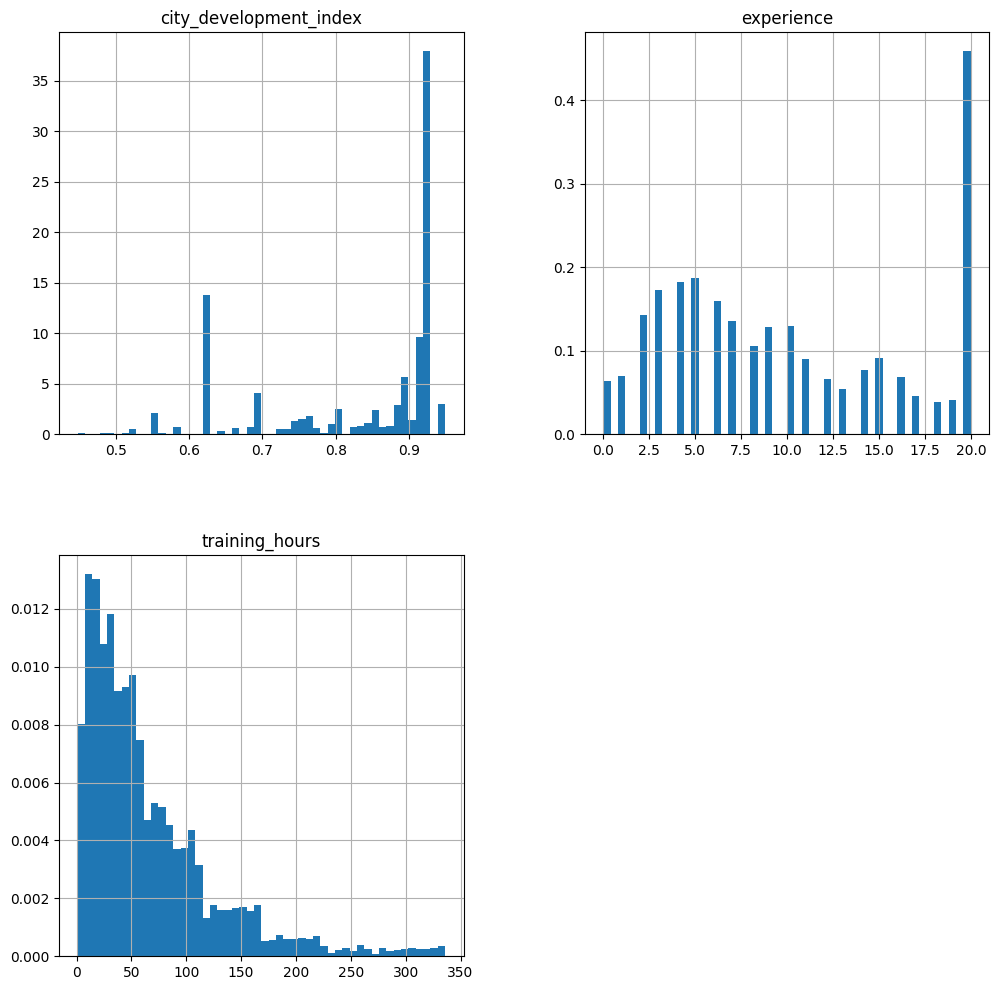

In [17]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

<Axes: >

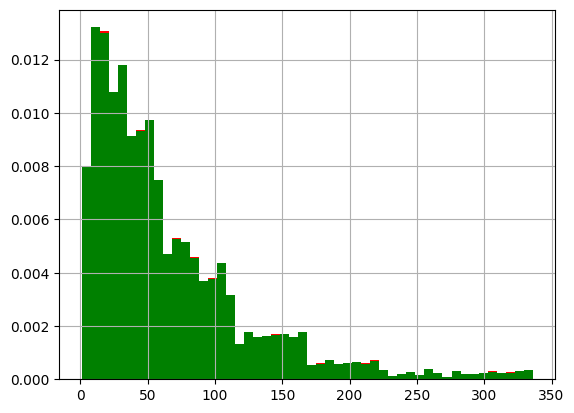

In [19]:
#comparing training hours data distribution before and after
df['training_hours'].hist(bins=50, density=True, color='red')
new_df['training_hours'].hist(bins=50, density=True, color='green')

#overlapping

<Axes: >

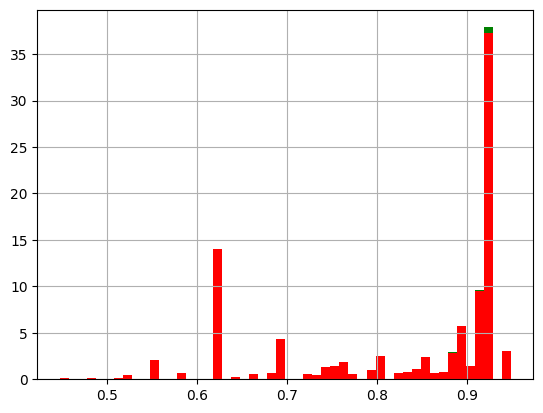

In [23]:

new_df['city_development_index'].hist(bins=50, density=True, color='green')
df['city_development_index'].hist(bins=50, density=True, color='red')
#overlapping

<Axes: >

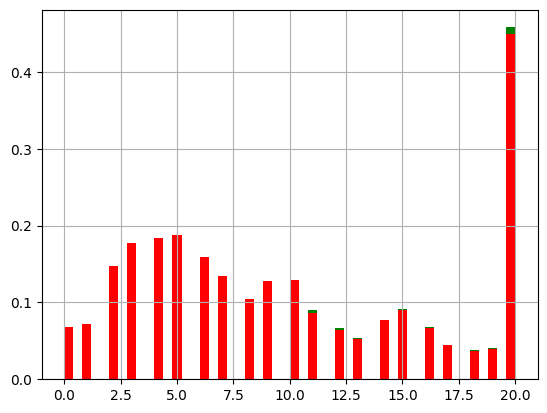

In [24]:

new_df['experience'].hist(bins=50, density=True, color='green')
df['experience'].hist(bins=50, density=True, color='red')
#overlapping

<Axes: ylabel='Density'>

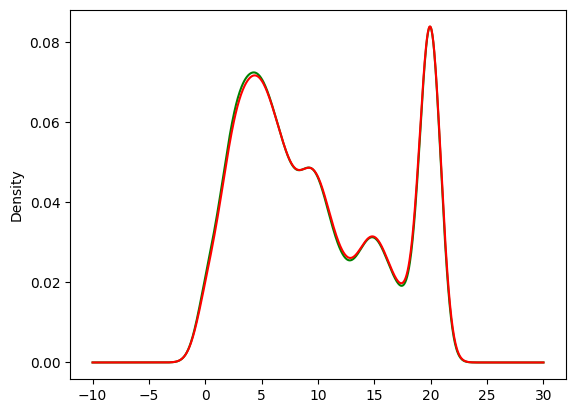

In [26]:
fig =plt.figure()
ax =fig.add_subplot(111)

df['experience'].plot.density(color='green')
new_df['experience'].plot.density(color='red')

In [36]:
temp=pd.concat([
#percentage of observation per categories,original data
df['enrolled_university'].value_counts()/len(df),

#percentage of observation per categories,cca data
new_df['enrolled_university'].value_counts()/len(new_df)
],axis=1 )

#add column Names
temp.columns =['original','cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
